# Dataset Overview
This dataset got all the info on transaction – transaction IDs, completion dates, types, subtypes, payment service providers (PSP), cities, amounts, dates, payee details, payer details, etc.

This dataset encompasses a variety of dimensions including temporal, financial, geographical, technical, and behavioral aspects of transactions, making it a potent resource for identifying and understanding fraudulent activities in financial systems.

# Analysis & Visualisation

In [2]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [3]:
#loading the dataset
fraud_data=pd.read_csv("Fraud Analytics Dataset - npci_data.csv")
pd.set_option('display.max_columns', None)
fraud_data.head()

,txn_id,dt_txn_comp,txn_comp_time,txn_type,txn_subtype,initiating_channel_id,txn_status,error_code,payer_psp,payee_psp,remitter_bank,beneficiary_bank,payer_handle,payer_app,payee_handle,payee_app,payee_requested_amount,payee_settlement_amount,payer_location,payer_city,payer_state,payee_location,payee_city,payee_state,payer_os_type,payee_os_type,beneficiary_mcc_code,remitter_mcc_code,custref_transaction_ref,cred_type,cred_subtype,payer_app_id,payee_app_id,initiation_mode,dt_time_txn_compl,time_of_day,@dropdown,@dropdown.1
0,436,2023-08-11,12:00:00 AM,Refund,Product Refund,4,Successful,NaN,Amazon Pay,BharatPe (for UPI and QR code payments),Allahabad Bank,Karur Vysya Bank,SCB,Standard Chartered UPI,KOTAK,BHIM KOTAK Pay,54020,54020,151001,Bathinda,Punjab,431601,Nanded,Maharashtra,Others,iOS,7277,6051,Reference 324,Debit Card,Prepaid Debit Card,BHIM Union Bank UPI App,AmazonPay,18,2023-08-11 0:00,Night,NaN,NaN
1,665,2021-10-17,12:00:00 AM,Payment,Peer-to-Peer (P2P),16,Successful,NaN,ICICI iMobile,Square (for international transactions),Madhya Bihar Gramin Bank,Kotak Mahindra Bank,WASBI,WhatsApp Pay,HDFCBANKJD,JustDial,37670,37670,208001,Kanpur,Uttar Pradesh,302001,Jaipur,Rajasthan,MacOS,Windows,7012,5966,Reference 550,Overdraft,Business Overdraft,ESAF,BHIM Union Bank UPI App,18,2021-10-17 0:00,Night,NaN,NaN
2,726,2019-11-16,12:00:00 AM,Withdrawal,ATM Withdrawal,3,Successful,NaN,Axis Pay,PhonePe for Merchants,Karur Vysya Bank,United Bank of India,KMBL,Khalijeb,UTKARSHBANK,UTKARSHBANK,22984,22984,125001,Hisar,Haryana,151001,Bathinda,Punjab,Android,Windows,1799,5047,Reference 611,Auto Loan,Used Car Loan,ICICI iMobile,BHIM Indus Pay,16,2019-11-16 0:00,Night,NaN,NaN
3,842,2023-09-05,12:00:00 AM,Transfer,Inter-bank Transfer,0,Successful,NaN,MobiKwik,ICICI Merchant Services,HDFC Bank,Corporation Bank,IDBI,BHIM PAyWIZ by IDBI Bank,WASBI,WhatsApp Pay,62038,62038,151001,Bathinda,Punjab,403401,Ponda,Goa,Android,Windows,8641,822,Reference 729,Overdraft,Personal Overdraft,BHIM UPI APP,JusPay Technologies,2,2023-09-05 0:00,Night,NaN,NaN
4,2202,2021-09-18,12:00:00 AM,Fee,Account Maintenance Fee,1,Successful,NaN,MasterCard,BharatPe (for UPI and QR code payments),Union Bank of India,Bank of India,UNIONBANK,BHIM Union Bank UPI App,NSDL,NSDL,72624,72624,768001,Sambalpur,Odisha,431601,Nanded,Maharashtra,Others,Windows,4225,5978,Reference 2068,Personal Loan,Unsecured Personal Loan,PREPAIDICICI,Cred,1,2021-09-18 0:00,Night,NaN,NaN


## How have fraud incidents fluctuated over the years?


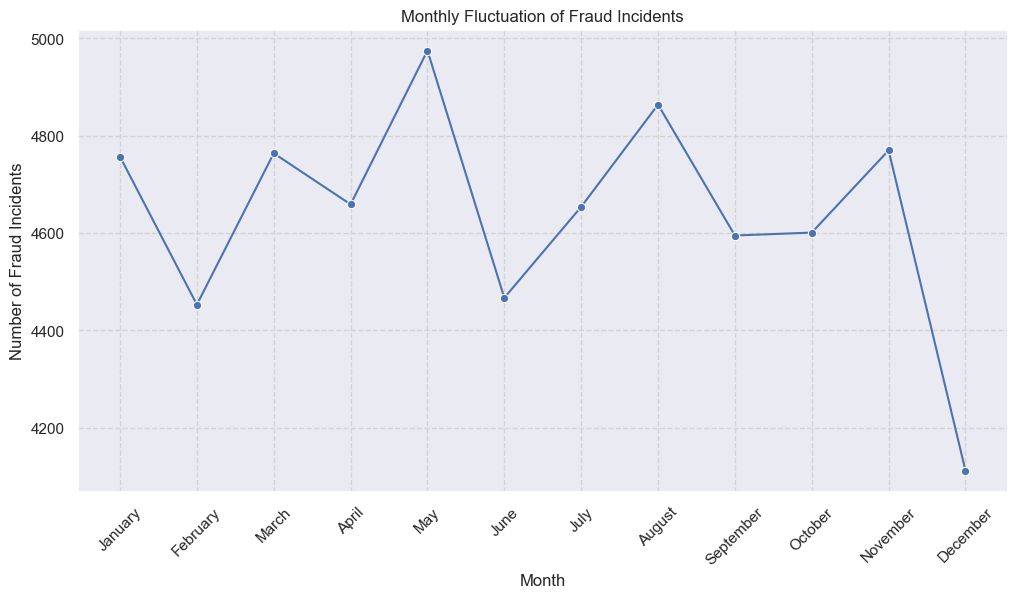

In [4]:
# Convert 'dt_txn_comp' to datetime format for date manipulation
fraud_data['dt_txn_comp'] = pd.to_datetime(fraud_data['dt_txn_comp'])

# Extract month from 'dt_txn_comp' for monthly fraud analysis
fraud_data['month'] = fraud_data['dt_txn_comp'].dt.month

# Group by month and count fraud incidents
fraud_counts = fraud_data.groupby('month').size().reset_index(name='fraud_count')

# Set seaborn plot aesthetics
sns.set(style="darkgrid", color_codes=True,
rc={"grid.linestyle": "--","grid.color": "lightgray"})

# Initialize figure with size for clarity
plt.figure(figsize=(12, 6))

# Create line plot for monthly fraud counts
sns.lineplot(x='month', y='fraud_count', data=fraud_counts, marker='o')

# Title and axes labels
plt.title('Monthly Fluctuation of Fraud Incidents')
plt.xlabel('Month')
plt.ylabel('Number of Fraud Incidents')

# Set x-ticks to month names, rotated for readability
plt.xticks(range(1, 13), calendar.month_name[1:13], rotation=45)

# Enable grid for readability
plt.grid(True)

# Display plot
plt.show()

- The graph shows a clear pattern of fraud incidents with constant spikes in July and August. This suggests the need for increased vigilance and preventive measures during these months.
- The sharp decline after June may indicate effective countermeasures, which could be replicated to mitigate future spikes.

## Which types of Credit fraud are causing the most financial damage?

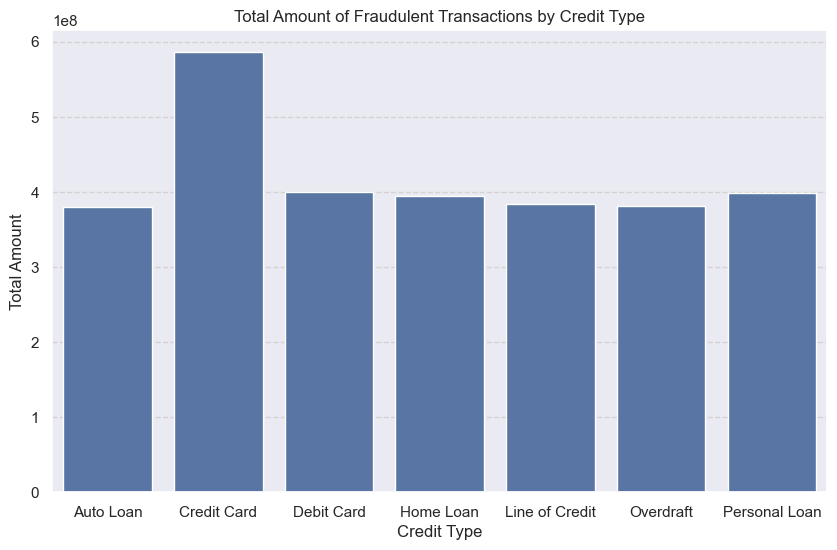

In [5]:
# Sum fraudulent amounts by credit type
fraudulent_amount_by_credit_type = fraud_data.groupby('cred_type')['payee_settlement_amount'].sum().reset_index()

# Initialize plot with specified figure size
plt.figure(figsize=(10, 6))

# Create bar plot for fraudulent amounts by credit type
sns.barplot(x='cred_type', y='payee_settlement_amount',
data=fraudulent_amount_by_credit_type)

# Set plot title and labels for clarity
plt.title('Total Amount of Fraudulent Transactions by Credit Type')
plt.xlabel('Credit Type')
plt.ylabel('Total Amount')
plt.show() # Display the plot

- Credit card and Personal Loan fraud represent the highest total amounts, indicating these areas are particularly high-risk.
- Given the high amount of fraud in credit cards, there could be an opportunity to educate customers on safe credit card practices.
‍

## Are there certain regions more prone to fraud incidents than others?

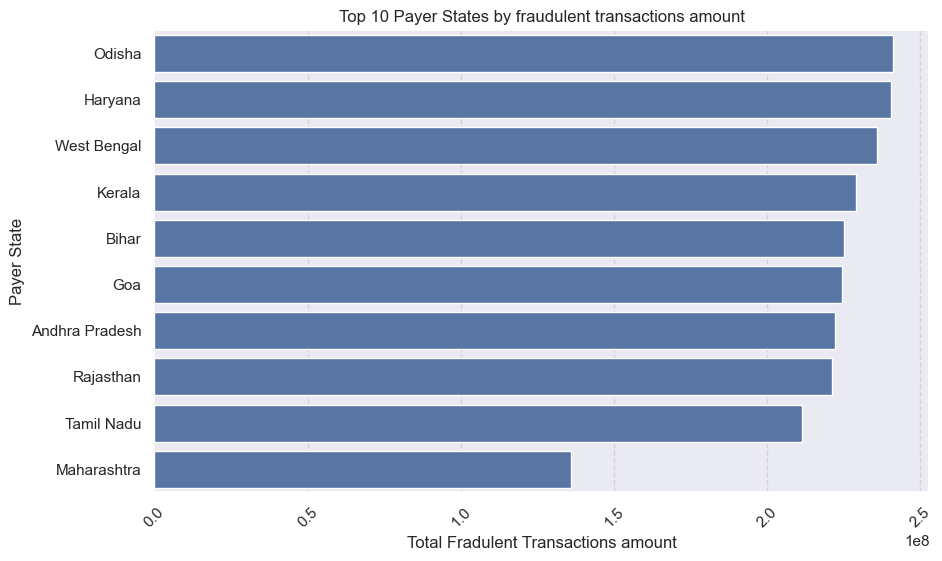

In [6]:
#grouping data by 'payer_state' , sum 'payee_settlement_amount', and get top 10
top_payer_states_amount=fraud_data.groupby('payer_state')['payee_settlement_amount'].sum().nlargest(10).reset_index()

#set th figure size for the plot
plt.figure(figsize=(10,6))

#create a horizontal bar plot for top 10 states
sns.barplot(x='payee_settlement_amount', y='payer_state', 
            data=top_payer_states_amount, orient='h')

#plot tittle and axis labels
plt.title('Top 10 Payer States by fraudulent transactions amount')
plt.xlabel('Total Fradulent Transactions amount')
plt.ylabel('Payer State')

#rotate x-tics for better visibility
plt.xticks(rotation=45)
plt.show()

- States with higher fraudulent transaction amounts like Odisha, Haryana, and West Bengal may benefit from state-specific fraud prevention initiatives.
- Odisha, showing the highest total fraudulent transaction amount, should be subjected to more rigorous monitoring and investigative activities.

## Distribution of fraudluent Transaction Amount by Time of Day

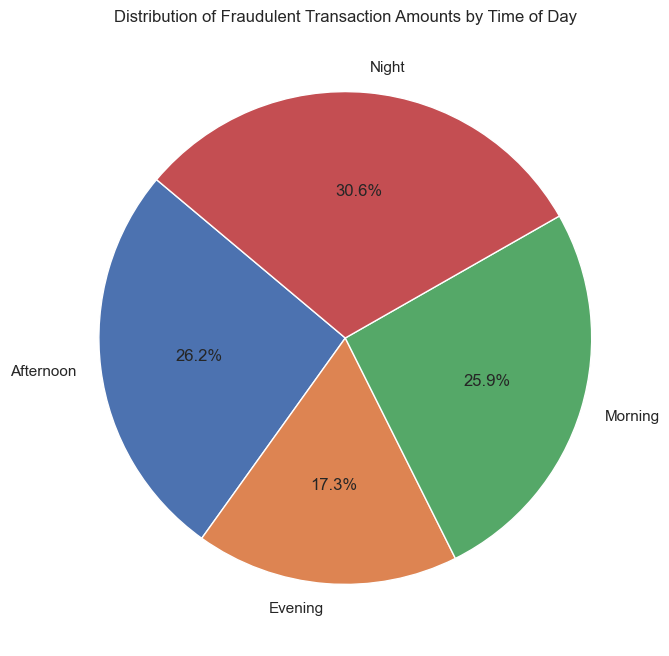

In [10]:
# Aggregate fraudulent amount by time of day
fraudulent_amount_by_time = fraud_data.groupby('time_of_day')[ 'payee_settlement_amount'].sum().reset_index()

# Initialize pie chart figure with specified size 
plt.figure(figsize=(8, 8))

# Create pie chart for fraudulent transaction amounts by time of day 
plt.pie(fraudulent_amount_by_time['payee_settlement_amount'], labels=fraudulent_amount_by_time['time_of_day'], autopct='%1.1f%%', startangle=140)

# Title for the pie chart
plt.title('Distribution of Fraudulent Transaction Amounts by Time of Day')
plt.show()

- The largest share of fraudulent transactions occurs at night (31.0%), suggesting that fraudsters may prefer times when oversight may be lower and victims less vigilant.

## Conclusion
We need to improve our real-time fraud detection system and figure out technical challenges—it's a team effort. 

We need to understand the problem and ask the right questions to build a system that exceeds expectations. This approach ensures we protect our organization's finances in today's digital landscape.